<a href="https://colab.research.google.com/github/prachi-bhrdwj/colab/blob/main/secure_analysis_of_credit_card_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
!mv -f 'default of credit card clients.xls' 'CreditCard.xls'

--2021-09-11 18:05:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls’

default of credit c 100%[===================>]   5.28M  9.21MB/s    in 0.6s    

2021-09-11 18:05:11 (9.21 MB/s) - ‘default of credit card clients.xls’ saved [5539328/5539328]



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('ggplot')

import warnings 
warnings.filterwarnings('ignore')
pd.set_option("precision",3)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_excel('CreditCard.xls',header = 1, index_col = 0)
df.head(7)
df.shape


(30000, 24)

In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

df.describe()

In [8]:
df["default payment next month"].value_counts(normalize = True)

0   0.779
1   0.221
Name: default payment next month, dtype: float64

In [9]:
df["MARRIAGE"].value_counts(normalize = True)

2   0.532
1   0.455
3   0.011
0   0.002
Name: MARRIAGE, dtype: float64

In [12]:
from numpy import unique
counts = df.nunique()
for_delete = [i for i,v in enumerate(counts)if v == 1]
if for_delete == []:
  print("no of useless columns: empty")
else:
  print("no of useless columns are : ",for_delete)
df.drop(for_delete, axis = 1, inplace = True)
print( "\nafter dropping : ",'\n','objects(clients) =',df.shape[0],'/n','features(column names)=',df.shape[1])
if(df.shape[0] == 30000) and (df.shape[1]==24):
  print("\nno change in dimensionalities")
print("Numbers(Nr) of unique values(UV) for each column and its percent(%):\n")
print('Nr\tUV\t%')
print("----------------------")
for i in range (df.shape[1]):
  num= len(unique(df.iloc[:,i]))
  percentage = float(num)/df.shape[0]*100
  print('%d\t%d\t%.1f'%(i,num,percentage))
print("----------------------")

no of useless columns: empty

after dropping :  
 objects(clients) = 30000 /n features(column names)= 24

no change in dimensionalities
Numbers(Nr) of unique values(UV) for each column and its percent(%):

Nr	UV	%
----------------------
0	81	0.3
1	2	0.0
2	7	0.0
3	4	0.0
4	56	0.2
5	11	0.0
6	11	0.0
7	11	0.0
8	11	0.0
9	10	0.0
10	10	0.0
11	22723	75.7
12	22346	74.5
13	22026	73.4
14	21548	71.8
15	21010	70.0
16	20604	68.7
17	7943	26.5
18	7899	26.3
19	7518	25.1
20	6937	23.1
21	6897	23.0
22	6939	23.1
23	2	0.0
----------------------


In [14]:
df.corr().style.background_gradient(cmap = 'BrBG')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000,0.025,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,-0.235,0.285,0.278,0.283,0.294,0.296,0.290,0.195,0.178,0.210,0.203,0.217,0.220,-0.154
SEX,0.025,1.000,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.060,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.000,-0.001,-0.009,-0.002,-0.002,-0.003,-0.040
EDUCATION,-0.219,0.014,1.000,-0.143,0.175,0.105,0.122,0.114,0.109,0.098,0.082,0.024,0.019,0.013,-0.000,-0.008,-0.009,-0.037,-0.030,-0.040,-0.038,-0.040,-0.037,0.028
MARRIAGE,-0.108,-0.031,-0.143,1.000,-0.414,0.020,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.008,-0.004,-0.013,-0.001,-0.007,-0.024
AGE,0.145,-0.091,0.175,-0.414,1.000,-0.039,-0.050,-0.053,-0.050,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.271,-0.058,0.105,0.020,-0.039,1.000,0.672,0.574,0.539,0.509,0.475,0.187,0.190,0.180,0.179,0.181,0.177,-0.079,-0.070,-0.071,-0.064,-0.058,-0.059,0.325
PAY_2,-0.296,-0.071,0.122,0.024,-0.050,0.672,1.000,0.767,0.662,0.623,0.576,0.235,0.235,0.224,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.264
PAY_3,-0.286,-0.066,0.114,0.033,-0.053,0.574,0.767,1.000,0.777,0.687,0.633,0.208,0.237,0.227,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.046,-0.036,-0.036,0.235
PAY_4,-0.267,-0.060,0.109,0.033,-0.050,0.539,0.662,0.777,1.000,0.820,0.716,0.203,0.226,0.245,0.246,0.243,0.239,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027,0.217
PAY_5,-0.249,-0.055,0.098,0.036,-0.054,0.509,0.623,0.687,0.820,1.000,0.817,0.207,0.227,0.243,0.272,0.270,0.263,-0.006,-0.003,0.009,-0.058,-0.033,-0.023,0.204


In [15]:
df_exmple = pd.DataFrame(df, columns = df.columns.tolist()[0:6])
df_exmple.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0
ID,,,,,,
1,20000,2,2,1,24,2
2,120000,2,2,2,26,-1
3,90000,2,2,2,34,0
4,50000,2,2,1,37,0
5,50000,1,2,1,57,-1


In [16]:
df_unique = pd.DataFrame(df,columns = df.columns.tolist()[11:23])
df_unique.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Text(0.5, 1.05, 'correlation matrix\n\n')

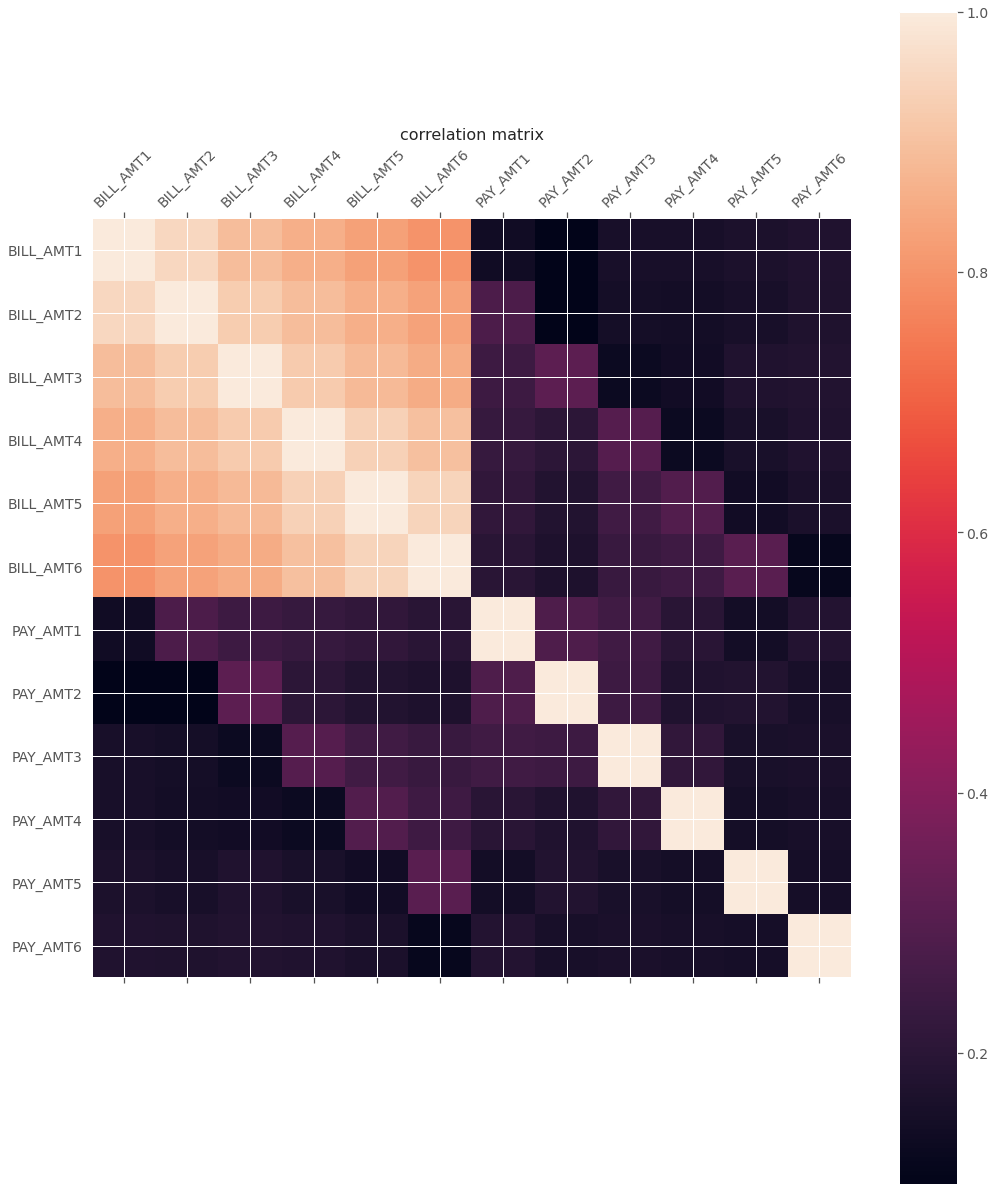

In [20]:
f = plt.figure(figsize=(17,21))
plt.matshow(df_unique.corr(),fignum=f.number)
plt.xticks(range(df_unique.shape[1]), df_unique.columns, fontsize=14,rotation=45)
plt.yticks(range(df_unique.shape[1]),df_unique.columns, fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('correlation matrix\n\n',fontsize=16)